# Telecom Churn - ML Group Case Study
### By Subhasis Jethy and Trisit Kumar Chatterjee

## Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. <br>
In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it <br>
costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

__Goal__ is to build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Steps:

- Analyse customer-level data of a leading telecom firm.
- Build predictive models to identify customers at high risk of churn.
- Identify the main indicators of churn.

## Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import PowerTransformer

from matplotlib import style

# settings for aesthetics
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_rows', 100)
pd.set_option('float_format', '{:f}'.format)
%matplotlib inline
sns.set_style('darkgrid')
style.use('fivethirtyeight')

np.random.seed(42)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the data dictionary
dic = pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")

## Data Dictionary

In [3]:
dic

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belongs to
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mobile to mobile)"
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


In [4]:
#Read the telecom churn csv file
telecom_churn_df = pd.read_csv("./telecom_churn_data.csv")

In [5]:
telecom_churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.000000,0.000000,0.000000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385000,...,0,1.000000,1.000000,1.000000,nan,968,30.400000,0.000000,101.200000,3.580000
1,7001865778,109,0.000000,0.000000,0.000000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047000,...,0,nan,1.000000,1.000000,nan,1006,0.000000,0.000000,0.000000,0.000000
2,7001625959,109,0.000000,0.000000,0.000000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690000,...,0,nan,nan,nan,1.000000,1103,0.000000,0.000000,4.170000,0.000000
3,7001204172,109,0.000000,0.000000,0.000000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338000,...,0,nan,nan,nan,nan,2491,0.000000,0.000000,0.000000,0.000000
4,7000142493,109,0.000000,0.000000,0.000000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636000,...,0,0.000000,nan,nan,nan,1526,0.000000,0.000000,0.000000,0.000000


## Data Cleaning

In [6]:
telecom_churn_df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

We are having 225 columns and 99999 rows of data.

All of the date columns have been incorrectly interpreted as Object Types.

In [7]:
# Remove Mobile Number
telecom_churn_df.drop(['mobile_number'],axis=1,inplace=True)

In [8]:
# Convert all Object Type columns to Datetime
date_cols_df = telecom_churn_df.select_dtypes('object')
date_cols = date_cols_df.columns

In [9]:
# Convert to Datetime
for col in date_cols:
    date_cols_df[col] = pd.to_datetime(date_cols_df[col],errors='ignore')

In [10]:
print(f'Columns which have been interpreted as Object Type by Pandas but are DateTime : \n{os.linesep.join(date_cols)}')

Columns which have been interpreted as Object Type by Pandas but are DateTime : 
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
last_date_of_month_9
date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_9
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8
date_of_last_rech_data_9


In [11]:
# Merge datetime adjusted columns with the original dataframe
telecom_churn_df[date_cols] = date_cols_df

In [12]:
telecom_churn_df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 225 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   circle_id                 99999 non-null  int64         
 1   loc_og_t2o_mou            98981 non-null  float64       
 2   std_og_t2o_mou            98981 non-null  float64       
 3   loc_ic_t2o_mou            98981 non-null  float64       
 4   last_date_of_month_6      99999 non-null  datetime64[ns]
 5   last_date_of_month_7      99398 non-null  datetime64[ns]
 6   last_date_of_month_8      98899 non-null  datetime64[ns]
 7   last_date_of_month_9      98340 non-null  datetime64[ns]
 8   arpu_6                    99999 non-null  float64       
 9   arpu_7                    99999 non-null  float64       
 10  arpu_8                    99999 non-null  float64       
 11  arpu_9                    99999 non-null  float64       
 12  onnet_mou_6      

Now all the columns are of correct data types.

### Remove Columns with a Single Unique Value (Zero Variance)

In [13]:
# Find and Remove Columns with Zero Variance or Constant Columns

zero_var_columns = []
for col in telecom_churn_df.columns:
    if telecom_churn_df[col].nunique() == 1:
        zero_var_columns.append(col)

print(f'Columns which have been identified as Zero Variance Columns are: \n{os.linesep.join(zero_var_columns)}')

Columns which have been identified as Zero Variance Columns are: 
circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
last_date_of_month_9
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_t2c_mou_9
std_ic_t2o_mou_6
std_ic_t2o_mou_7
std_ic_t2o_mou_8
std_ic_t2o_mou_9


In [14]:
telecom_churn_df.drop(zero_var_columns,axis=1,inplace=True)

In [15]:
telecom_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 209 entries, arpu_6 to sep_vbc_3g
dtypes: datetime64[ns](8), float64(168), int64(33)
memory usage: 159.5 MB


We now have 209 columns.

In [16]:
!pip install Jinja2

### Handle Missing Values

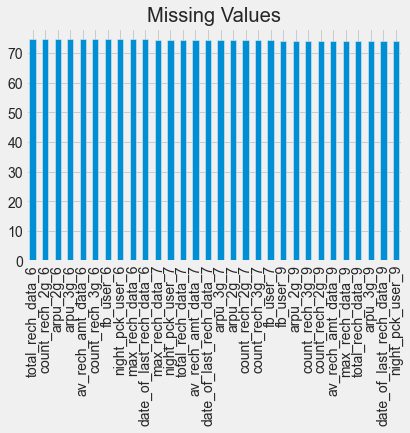

,Total,Percent
total_rech_data_6,74846,74.850000
count_rech_2g_6,74846,74.850000
arpu_2g_6,74846,74.850000
arpu_3g_6,74846,74.850000
av_rech_amt_data_6,74846,74.850000
count_rech_3g_6,74846,74.850000
fb_user_6,74846,74.850000
night_pck_user_6,74846,74.850000
max_rech_data_6,74846,74.850000
date_of_last_rech_data_6,74846,74.850000


In [17]:
# Finding and Handling Missing Values 

def find_missing_values(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/len(df.index))*100
    percent = round(percent,2)
    missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
    plt.title('Missing Values')
  
    return missing_data

missing_data = find_missing_values(telecom_churn_df)
missing_data['Percent'].head(30).plot.bar()
plt.show()

missing_data.head(50).style.background_gradient(cmap='Blues')

In [18]:
#Columns having 0-5% null values
na_5 = missing_data[(missing_data['Percent']<=5.000) & (missing_data['Percent']>00.00)]

In [19]:
#Columns having 5-10% null values
na_10 = missing_data[(missing_data['Percent']<=10.000) & (missing_data['Percent']>05.00)]

In [20]:
#Columns having more than 70% null values
na_70 = missing_data[(missing_data['Percent']>=70.00)]

In [21]:
#Check for columns having between 10-70% null values
missing_data[(missing_data['Percent']>10.000) & (missing_data['Percent']<70.000)]

,Total,Percent


#### It can be seen that there are no columns with 10-70% Null values

In [22]:
print(f'Number of columns which have more than 70% null values: \n{missing_data[missing_data.Percent>70.000].count()[0]}')

Number of columns which have more than 70% null values: 
40


In [23]:
#Check unique values of each column having null values greater than 70%
print("date_of_last_rech_data_6 --", telecom_churn_df.date_of_last_rech_data_6.unique())
print("date_of_last_rech_data_7 --", telecom_churn_df.date_of_last_rech_data_7.unique())
print("date_of_last_rech_data_8 --", telecom_churn_df.date_of_last_rech_data_8.unique())
print("date_of_last_rech_data_9 --", telecom_churn_df.date_of_last_rech_data_9.unique())
print("-"*100)
print("count_rech_2g_6 --", telecom_churn_df.count_rech_2g_6.unique())
print("count_rech_2g_7 --", telecom_churn_df.count_rech_2g_7.unique())
print("count_rech_2g_8 --", telecom_churn_df.count_rech_2g_8.unique())
print("count_rech_2g_9 --", telecom_churn_df.count_rech_2g_9.unique())
print("-"*100)
print("count_rech_3g_6 --", telecom_churn_df.count_rech_3g_6.unique())
print("count_rech_3g_7 --", telecom_churn_df.count_rech_3g_7.unique())
print("count_rech_3g_8 --", telecom_churn_df.count_rech_3g_8.unique())
print("count_rech_3g_9 --", telecom_churn_df.count_rech_3g_9.unique())
print("-"*100)
print("total_rech_data_6 --", telecom_churn_df.total_rech_data_6.unique())
print("total_rech_data_7 --", telecom_churn_df.total_rech_data_7.unique())
print("total_rech_data_8 --", telecom_churn_df.total_rech_data_8.unique())
print("total_rech_data_9 --", telecom_churn_df.total_rech_data_9.unique())
print("-"*100)
print("max_rech_data_6 --", telecom_churn_df.max_rech_data_6.unique())
print("max_rech_data_7 --", telecom_churn_df.max_rech_data_7.unique())
print("max_rech_data_8 --", telecom_churn_df.max_rech_data_8.unique())
print("max_rech_data_9 --", telecom_churn_df.max_rech_data_9.unique())
print("-"*100)
print("arpu_2g_6 --", telecom_churn_df.arpu_2g_6.unique())
print("arpu_2g_7 --", telecom_churn_df.arpu_2g_7.unique())
print("arpu_2g_8 --", telecom_churn_df.arpu_2g_8.unique())
print("arpu_2g_9 --", telecom_churn_df.arpu_2g_9.unique())
print("-"*100)
print("arpu_3g_6 --", telecom_churn_df.arpu_3g_6.unique())
print("arpu_3g_7 --", telecom_churn_df.arpu_3g_7.unique())
print("arpu_3g_8 --", telecom_churn_df.arpu_3g_8.unique())
print("arpu_3g_9 --", telecom_churn_df.arpu_3g_9.unique())
print("-"*100)
print("night_pck_user_6 --", telecom_churn_df.night_pck_user_6.unique())
print("night_pck_user_7 --", telecom_churn_df.night_pck_user_7.unique())
print("night_pck_user_8--", telecom_churn_df.night_pck_user_8.unique())
print("night_pck_user_9 --", telecom_churn_df.night_pck_user_9.unique())
print("-"*100)
print("fb_user_6 --", telecom_churn_df.fb_user_6.unique())
print("fb_user_7 --", telecom_churn_df.fb_user_7.unique())
print("fb_user_8 --", telecom_churn_df.fb_user_8.unique())
print("fb_user_9 --", telecom_churn_df.fb_user_9.unique())
print("-"*100)

date_of_last_rech_data_6 -- ['2014-06-21T00:00:00.000000000'                           'NaT'
 '2014-06-04T00:00:00.000000000' '2014-06-27T00:00:00.000000000'
 '2014-06-30T00:00:00.000000000' '2014-06-06T00:00:00.000000000'
 '2014-06-02T00:00:00.000000000' '2014-06-12T00:00:00.000000000'
 '2014-06-19T00:00:00.000000000' '2014-06-29T00:00:00.000000000'
 '2014-06-05T00:00:00.000000000' '2014-06-17T00:00:00.000000000'
 '2014-06-11T00:00:00.000000000' '2014-06-25T00:00:00.000000000'
 '2014-06-10T00:00:00.000000000' '2014-06-20T00:00:00.000000000'
 '2014-06-23T00:00:00.000000000' '2014-06-13T00:00:00.000000000'
 '2014-06-26T00:00:00.000000000' '2014-06-16T00:00:00.000000000'
 '2014-06-14T00:00:00.000000000' '2014-06-24T00:00:00.000000000'
 '2014-06-28T00:00:00.000000000' '2014-06-15T00:00:00.000000000'
 '2014-06-09T00:00:00.000000000' '2014-06-22T00:00:00.000000000'
 '2014-06-01T00:00:00.000000000' '2014-06-08T00:00:00.000000000'
 '2014-06-07T00:00:00.000000000' '2014-06-18T00:00:00.00000000

In [24]:
#As Night pack user and fb user columns have only 0 and 1s. Let's impute by adding min value
for column in telecom_churn_df.filter(regex ='user').columns:
    telecom_churn_df[column].replace(np.nan, 0, inplace = True)

In [25]:
# drop column with > 70% missing values
telecom_churn_df.drop(na_70.index, axis=1, inplace=True)

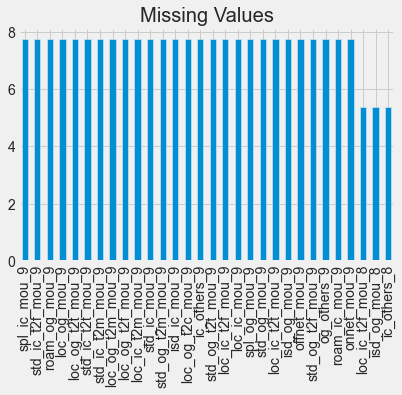

,Total,Percent
spl_ic_mou_9,7745,7.750000
std_ic_t2f_mou_9,7745,7.750000
roam_og_mou_9,7745,7.750000
loc_og_mou_9,7745,7.750000
loc_og_t2t_mou_9,7745,7.750000
std_ic_t2t_mou_9,7745,7.750000
std_ic_t2m_mou_9,7745,7.750000
loc_og_t2m_mou_9,7745,7.750000
loc_og_t2f_mou_9,7745,7.750000
loc_ic_t2m_mou_9,7745,7.750000


In [26]:
#After imputing all the variables having null values more than 70%, let's verify the null values 
missing_data = find_missing_values(telecom_churn_df)
missing_data['Percent'].head(30).plot.bar()
plt.show()

missing_data.head(50).style.background_gradient(cmap='Blues')

We are now left with columns which have less than 10% missing data. 

In [27]:
#impute date columns
date_columns = telecom_churn_df.filter(regex ='date').columns

In [28]:
for d in date_columns:
    # telecom_churn_df[d] = pd.to_datetime(telecom_churn_df[d]).dt.day
    telecom_churn_df[d].fillna(telecom_churn_df[d].max(), inplace=True)

### Impute columns where nan values % is less than 10

In [29]:
print(f'There are {len(missing_data[missing_data.Percent > 0])} columns with less than 10% missing values.')

There are 112 columns with less than 10% missing values.


### Impute Using Iterative Imputer 

Iterative imputation refers to a process where each feature is modeled as a function of the other features, e.g. a regression problem where missing values are predicted. Each feature is imputed sequentially, one after the other, allowing prior imputed values to be used as part of a model in predicting subsequent features.

It is iterative because this process is repeated multiple times, allowing ever improved estimates of missing values to be calculated as missing values across all features are estimated.

In [30]:
# column_names = telecom_churn_df.columns

In [31]:
# Impute remaining values using iterative imputer
# telecom_churn_df = pd.DataFrame(IterativeImputer().fit_transform(telecom_churn_df))

In [32]:
#Check if null values exist
# telecom_churn_df.isnull().sum().sum()

In [33]:
# telecom_churn_df.columns = column_names

In [34]:
telecom_churn_df.fillna(0,inplace=True)

*******

## Feature Engineering / Derived Metrics

In [35]:
# Find out ratio of revenue on happy/action phase
telecom_churn_df['arpu_ratio'] = ((telecom_churn_df.arpu_6 + telecom_churn_df.arpu_7)/2)/[1 if x ==0 else x for x in telecom_churn_df.arpu_8]

In [36]:
# Find out if customer centre call were made more in action phase
telecom_churn_df['call_centre_ratio'] = ((telecom_churn_df.loc_og_t2c_mou_6 + telecom_churn_df.loc_og_t2c_mou_7)/2)/[1 if x ==0 else x for x in telecom_churn_df.loc_og_t2c_mou_8]

In [37]:
# Find out ratio of usage from other network
telecom_churn_df['network_usage_diff'] = (telecom_churn_df.onnet_mou_8) - ( telecom_churn_df.offnet_mou_8)
# Find out ratio of usage from other network
telecom_churn_df['network_usage_diff_good'] = (telecom_churn_df.onnet_mou_6 + telecom_churn_df.onnet_mou_7 - telecom_churn_df.offnet_mou_6 - telecom_churn_df.offnet_mou_6)/2

In [38]:
# Find ratio of good/action for 2g
telecom_churn_df['2g_usage_ratio'] = ((telecom_churn_df.vol_2g_mb_6 + telecom_churn_df.vol_2g_mb_7)/2)/[1 if x ==0 else x for x in telecom_churn_df.vol_2g_mb_8]

In [39]:

# Find ratio of good/action for 3g
telecom_churn_df['3g_usage_ratio'] = ((telecom_churn_df.vol_3g_mb_6 + telecom_churn_df.vol_3g_mb_7)/2)/[1 if x ==0 else x for x in telecom_churn_df.vol_3g_mb_8]

In [40]:
# Find ratio of good/action for outgoing call
telecom_churn_df['og_ratio'] = ((telecom_churn_df.total_og_mou_6 + telecom_churn_df.total_og_mou_7)/2)/[1 if x ==0 else x for x in telecom_churn_df.total_og_mou_8]

In [41]:
# Find ratio of good/action for outgoing call
telecom_churn_df['ic_ratio'] = ((telecom_churn_df.total_ic_mou_6 + telecom_churn_df.total_ic_mou_7)/2)/[1 if x ==0 else x for x in telecom_churn_df.total_ic_mou_8]

In [42]:

# Find ratio of good/action for vbc
telecom_churn_df['vbc_difference'] = ((telecom_churn_df.jun_vbc_3g + telecom_churn_df.jul_vbc_3g)/2) - [1 if x ==0 else x for x in telecom_churn_df.aug_vbc_3g]

In [43]:
telecom_churn_df['months_on_network'] = telecom_churn_df.aon / 30
telecom_churn_df.drop('aon',axis=1,inplace=True)

In [44]:
# Derived Features from the date columns
def calculate_days_between_recharges(date_month_2 , date_month_1):
    
    days = (date_month_2 - date_month_1).dt.days
    return days

In [45]:
# Include new derived columns and drop original last recharge date features

telecom_churn_df['days_between_rech_7_6'] = calculate_days_between_recharges(telecom_churn_df.date_of_last_rech_7,telecom_churn_df.date_of_last_rech_6)

telecom_churn_df['days_between_rech_8_7'] = calculate_days_between_recharges(telecom_churn_df.date_of_last_rech_8,telecom_churn_df.date_of_last_rech_7)

# telecom_churn_df['days_between_rech_data_7_6'] = calculate_days_between_recharges(telecom_churn_df.date_of_last_rech_data_7,telecom_churn_df.date_of_last_rech_data_6)
# telecom_churn_df['days_between_rech_data_8_7'] = calculate_days_between_recharges(telecom_churn_df.date_of_last_rech_data_8,telecom_churn_df.date_of_last_rech_data_7)

# telecom_churn_df.drop(['date_of_last_rech_7','date_of_last_rech_6','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_6','date_of_last_rech_data_9',],axis=1,inplace=True)

telecom_churn_df.drop(['date_of_last_rech_7','date_of_last_rech_6','date_of_last_rech_8','date_of_last_rech_9',],axis=1,inplace=True)

In [46]:
def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

In [47]:
telecom_churn_df, _ = reduce_mem_usage(telecom_churn_df)

****
Column:  loc_og_t2t_mou_9
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  loc_og_t2m_mou_6
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  loc_og_t2m_mou_7
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  loc_og_t2m_mou_8
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  loc_og_t2m_mou_9
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  loc_og_t2f_mou_6
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  loc_og_t2f_mou_7
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  loc_og_t2f_mou_8
dtype before:  float64
dtype after:  f

### Find the High Value Customer

The high value customers are those who have an average spend over the 70th percentile in the 6th and 7th months (good phase).

In [48]:
telecom_churn_df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,network_usage_diff,network_usage_diff_good,2g_usage_ratio,3g_usage_ratio,og_ratio,ic_ratio,vbc_difference,months_on_network,days_between_rech_7_6,days_between_rech_8_7
0,197.384995,214.815994,213.802994,21.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.734783,1.068926,0.000000,0.000000,20.200001,32.266666,25,23
1,34.047001,355.074005,268.321014,86.285004,24.110001,78.680000,7.680000,18.340000,15.740000,99.839996,...,-297.079987,35.654999,0.147851,0.000000,0.350211,0.154815,-1.000000,33.533333,32,28
2,167.690002,189.057999,210.225998,290.713989,11.540000,55.240002,37.259998,74.809998,143.330002,220.589996,...,-171.100006,-109.940002,0.000000,0.000000,0.995358,1.125952,1.085000,36.766666,37,21
3,221.337997,251.102005,508.053986,389.500000,99.910004,54.389999,310.980011,241.710007,123.309998,109.010002,...,239.300003,-46.160000,0.000000,0.000000,0.508986,4.674290,-1.000000,83.033333,33,31
4,261.635986,309.876007,238.173996,163.425995,50.310001,149.440002,83.889999,58.779999,76.959999,91.879997,...,-40.369999,22.915001,0.000000,0.000000,0.885401,0.612039,-1.000000,50.866665,32,12


### In this case study, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

#### Get total avg recharge amount for 6th and 7th months - Good phase

In [49]:
telecom_churn_df['avg_rech_good_phase'] = ( telecom_churn_df.total_rech_amt_6  + telecom_churn_df.total_rech_amt_7 ) / 2 

In [50]:
cutoff = telecom_churn_df.avg_rech_good_phase.quantile(0.7)

In [51]:
print(f'The cutoff for average recharge in case of high value customer is: {cutoff} ')

The cutoff for average recharge in case of high value customer is: 368.5 


### Fetching High Value customer of more than 70th percentile(inclusive) of data set

In [52]:
high_value_customers_df = telecom_churn_df[telecom_churn_df.avg_rech_good_phase >= cutoff]
print(high_value_customers_df.shape)

(30011, 177)


### Tag churners and remove attributes of the churn phase

Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.<br>
The attributes you need to use to tag churners are:

-   total_ic_mou_9

-   total_og_mou_9

-   vol_2g_mb_9

-   vol_3g_mb_9


In [53]:
def tag_churned_customers(row):
    if ((row.total_ic_mou_9 ==0.0) and (row.total_og_mou_9 == 0.0)) \
       and ((row.vol_2g_mb_9 == 0.0) and (row.vol_3g_mb_9 == 0.0)) :
       return 1
    else:
        return 0
high_value_customers_df['churn']  = high_value_customers_df.apply(lambda x: tag_churned_customers(x),axis=1)

In [54]:
high_value_customers_df['churn'].value_counts(normalize=True)*100

0   91.359835
1    8.640165
Name: churn, dtype: float64

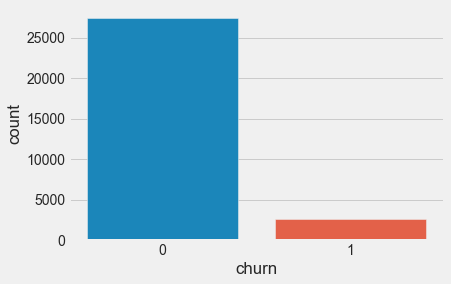

In [55]:
sns.countplot(high_value_customers_df.churn)
plt.show()

As can be seen only 8.64 % of High value customers have churned. This dataset is highly imbalanced for a Supervised ML use case. 

### Remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [56]:
high_value_customers_df = high_value_customers_df.loc[:,~high_value_customers_df.columns.str.endswith('_9')]

high_value_customers_df.reset_index(drop=True,inplace=True)
high_value_customers_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,2g_usage_ratio,3g_usage_ratio,og_ratio,ic_ratio,vbc_difference,months_on_network,days_between_rech_7_6,days_between_rech_8_7,avg_rech_good_phase,churn
0,1069.180054,1349.849976,3171.479980,57.840000,54.680000,52.290001,453.429993,567.159973,325.910004,16.230000,...,0.000000,0.000000,1.566098,1.381373,-38.680000,26.733334,28,32,1185.000000,1
1,378.721008,492.222992,137.362000,413.690002,351.029999,35.080002,94.660004,80.629997,136.479996,0.000000,...,5933.333496,31.446817,2.739625,4.000907,495.375000,10.500000,36,30,519.000000,0
2,492.846008,205.671005,593.260010,501.760010,108.389999,534.239990,413.309998,119.279999,482.459991,23.530001,...,0.000000,0.000000,0.541487,0.498541,-1.000000,86.900002,32,39,380.000000,0
3,430.975006,299.868988,187.893997,50.509998,74.010002,70.610001,296.290009,229.740005,162.759995,0.000000,...,0.000000,0.000000,1.355772,1.267439,11.170000,17.033333,31,14,459.000000,0
4,690.007996,18.980000,25.499001,1185.910034,9.280000,7.790000,61.639999,0.000000,5.540000,0.000000,...,0.000000,0.000000,625.169983,47.095001,-1.000000,22.233334,30,26,408.000000,0


# Exploratory Data Analysis

In [57]:
# checking variance to see which columns hold most information
round(100*(np.var(high_value_customers_df)/np.var(high_value_customers_df).sum()), 2).sort_values().tail()

total_og_mou_8    2.940000
vol_3g_mb_7       4.570000
vol_3g_mb_8       4.610000
vol_3g_mb_6       4.680000
arpu_ratio       12.820000
dtype: float64

# Univariate analysis

In [58]:
# Univariate analysis on all column
# for columns in telecom_churn_df_high.columns:
#     plt.figure(figsize=(16,3))
#     column = telecom_churn_df_high[columns]
#     print(columns)
#     sns.distplot(column,color='blue')
#     plt.show()

In [59]:
def box_plot_for_feature(df,feature_without_month):
    plt.figure(figsize=(18,7))
    plt.subplot(1,3,1)
    sns.boxplot(data = df, y = feature_without_month+'_6' ,x="churn",hue="churn",showfliers=False)

    plt.subplot(1,3,2)
    sns.boxplot(data = df, y = feature_without_month+'_7' ,x="churn",hue="churn",showfliers=False)

    plt.subplot(1,3,3)
    sns.boxplot(data = df, y = feature_without_month+'_8' ,x="churn",hue="churn",showfliers=False)

    plt.show()

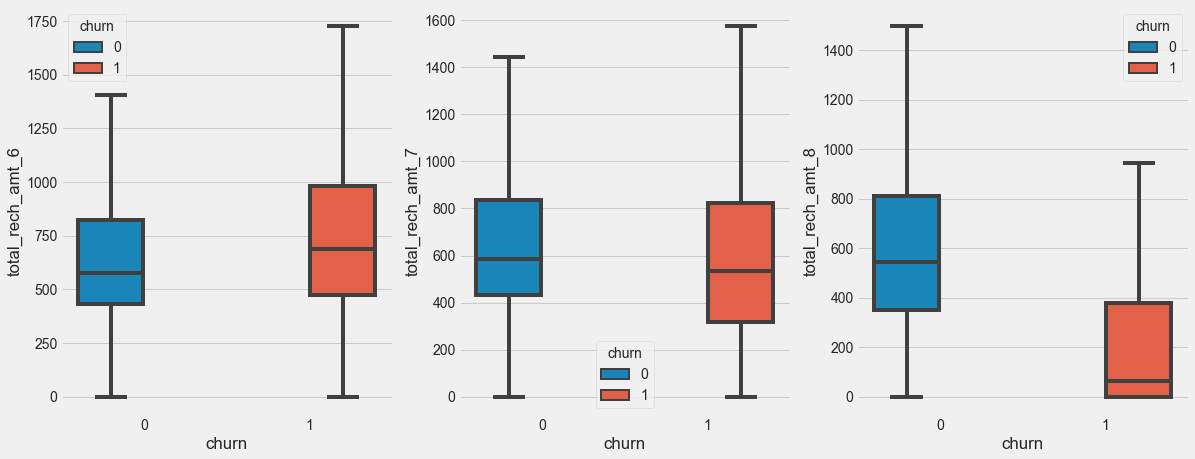

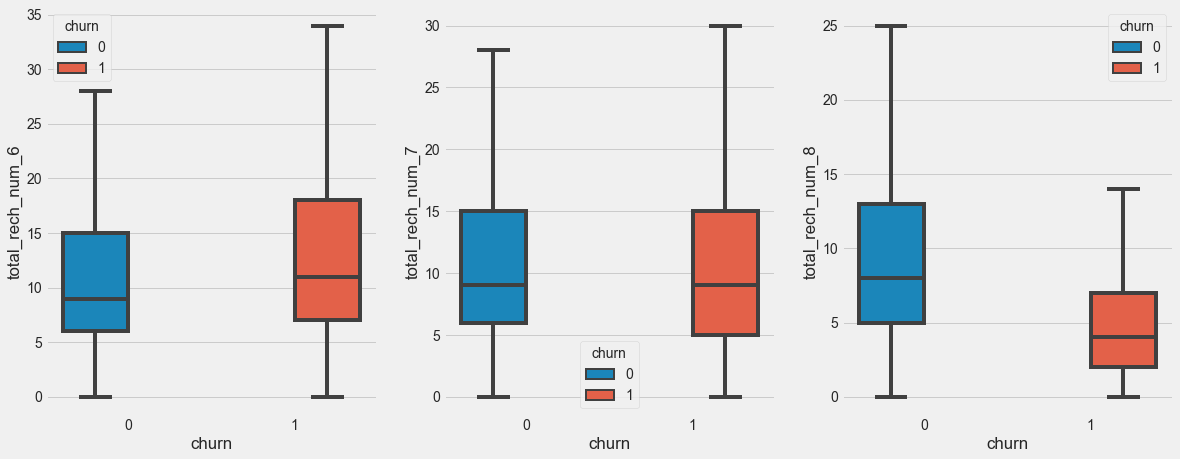

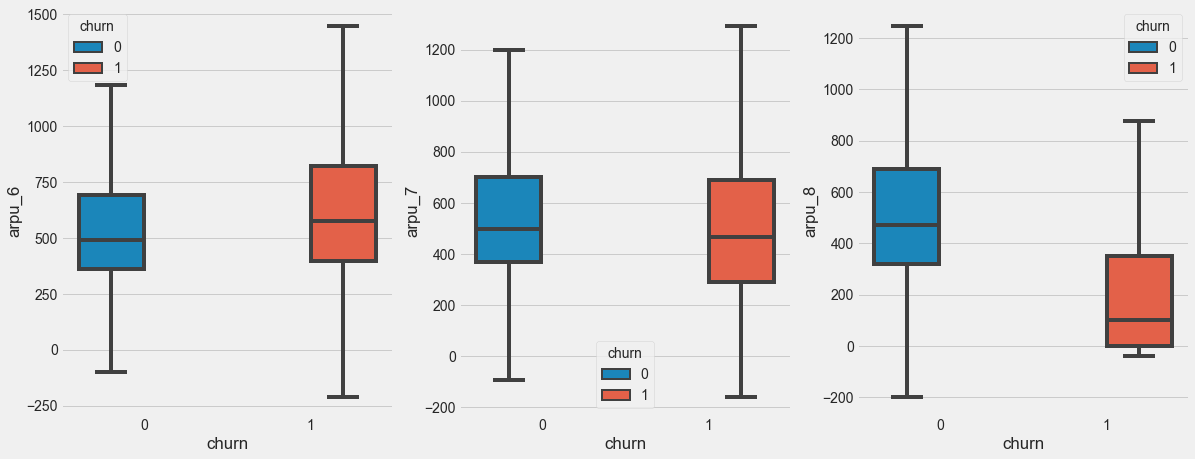

In [60]:
box_plot_for_feature(high_value_customers_df,'total_rech_amt')
box_plot_for_feature(high_value_customers_df,'total_rech_num')
box_plot_for_feature(high_value_customers_df,'arpu')

**Observations**:
-   The recharge amounts drop in the last action month.
-   The frequency of recharge is also dropping towards the action phase for the customer who churned.
-   The average revenue also drops towars the action phase for churned customers

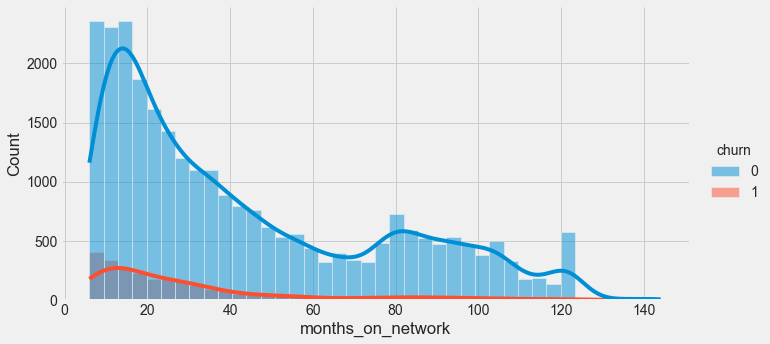

In [76]:
sns.displot(data = high_value_customers_df,x = 'months_on_network',hue='churn',kde=True,bins = 40,aspect = 2)
plt.show()

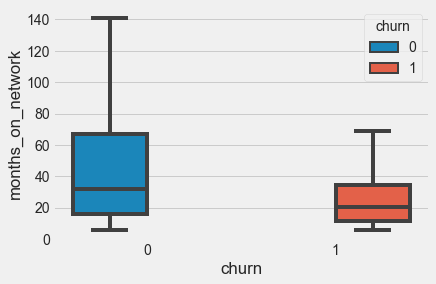

In [77]:
sns.boxplot(data = high_value_customers_df, y = 'months_on_network' ,x="churn",hue="churn",showfliers=False)
plt.show()

As can be seen from the above plots, churners usually stay less than 50 months.<br>
Majority of the customers are on the network for 60 months or less.<br>
And the Customers who have churned are not that old in the network .<br>
So the churn usually happens when they are between 20 - 40 Months on the network.

# Bivariate analysis

In [78]:
df_for_analysis = high_value_customers_df.copy()

In [82]:
def feature_counts(df,feature,text,set_logscale=False):
    '''
        df: Dataframe
        feature: Column to group on
        text: Display Text for feature
        set_logscale: Set log scale for y-axis

        This function plots the sum of the target variable grouped by
        a categorical feature
    '''
    
    plt.figure(figsize=(10,7))
    plt.title(f'Top {feature} by count',fontsize = 18)
    
    ax =sns.countplot(data=df,x = feature,hue='churn')
   
    if set_logscale:
        ax.set_yscale("log")
    plt.ylabel('Count',fontsize = 18)
    plt.xlabel(text,fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.xticks(rotation=90,fontsize = 16)
    plt.show()

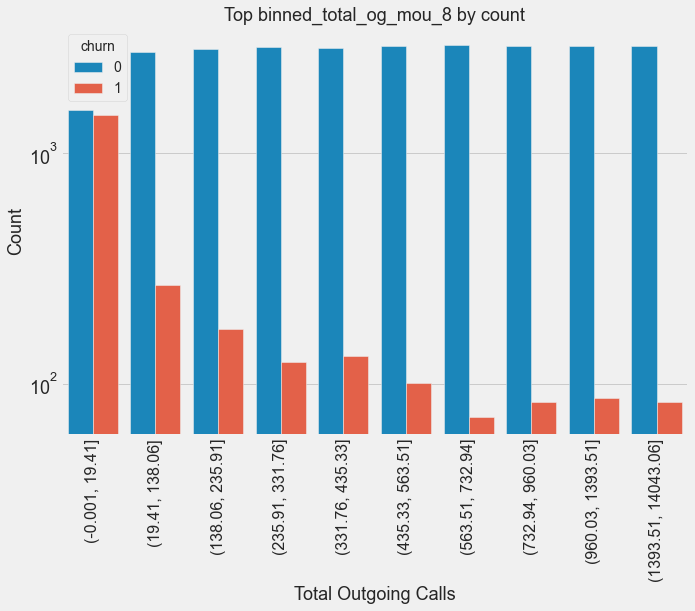

In [83]:
# customers not using outgoing calls for september are likely to churn
df_for_analysis['binned_total_og_mou_8'] = pd.qcut(df_for_analysis['total_og_mou_8'], 10)
feature_counts(df_for_analysis,'binned_total_og_mou_8',text='Total Outgoing Calls',set_logscale=True)

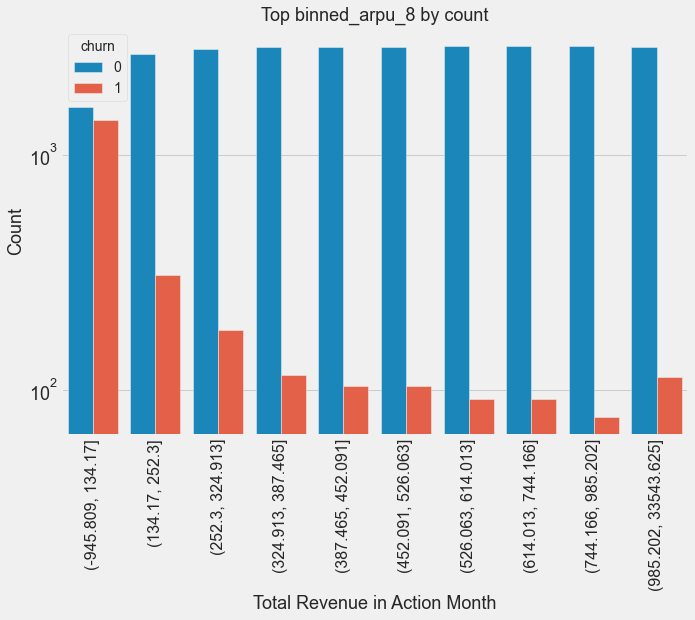

In [84]:
# customers having low arpu in action period is likely to churn
df_for_analysis['binned_arpu_8'] = pd.qcut(df_for_analysis['arpu_8'], 10)
feature_counts(df_for_analysis,'binned_arpu_8',text='Total Revenue in Action Month',set_logscale=True)

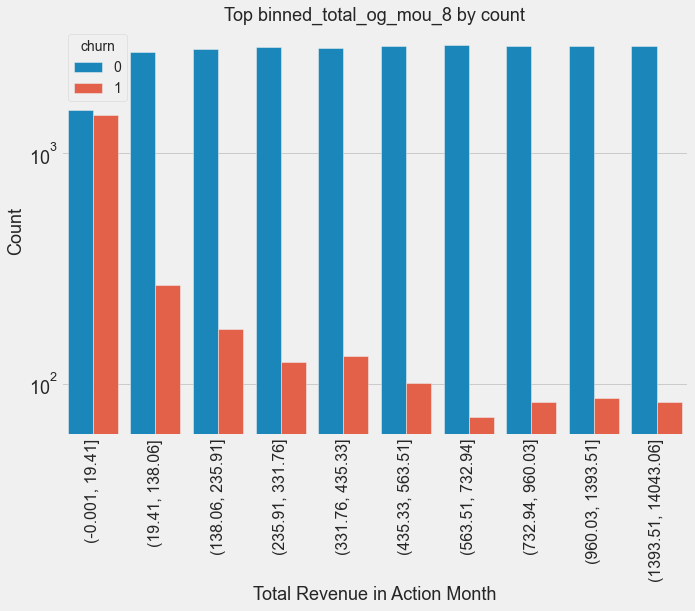

In [86]:
# customers not using outgoing calls for september are likely to churn
df_for_analysis['binned_total_og_mou_8'] = pd.qcut(df_for_analysis['total_og_mou_8'], 10)
feature_counts(df_for_analysis,'binned_total_og_mou_8',text='Total Revenue in Action Month',set_logscale=True)

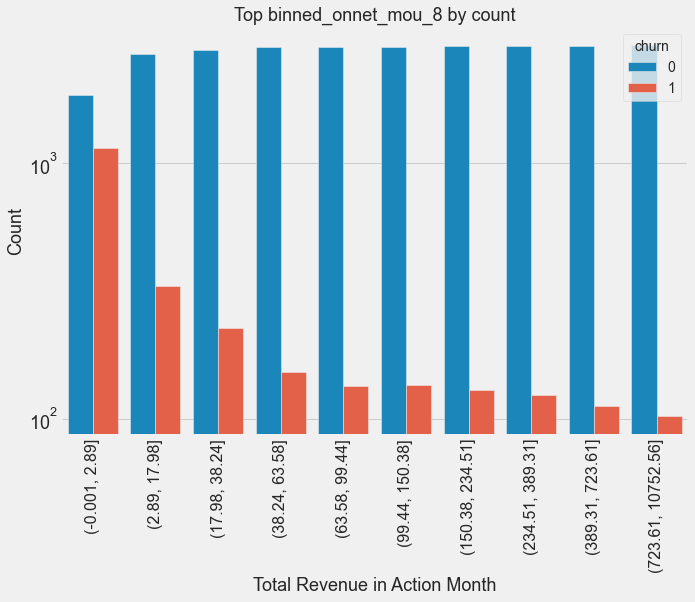

In [87]:
# customers not using outgoing calls for september are likely to churn
df_for_analysis['binned_onnet_mou_8'] = pd.qcut(df_for_analysis['onnet_mou_8'], 10)
feature_counts(df_for_analysis,'binned_onnet_mou_8',text='Total Revenue in Action Month',set_logscale=True)

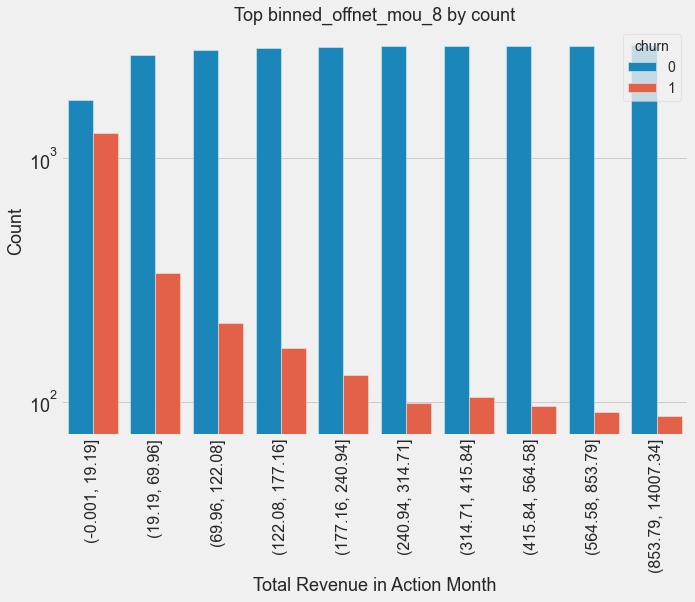

In [88]:
# customers not using outgoing calls for september are likely to churn
df_for_analysis['binned_offnet_mou_8'] = pd.qcut(df_for_analysis['offnet_mou_8'], 10)
feature_counts(df_for_analysis,'binned_offnet_mou_8',text='Total Revenue in Action Month',set_logscale=True)

# Outlier Treatment

There must be data which are not significant in predicting the Churn customers in every column and presence of this data would give biased results. Hence we can do outlier treatment to remove such data

We consider any points to be Outliers that are 3 standard deviations away from the mean.

In [90]:
pre_treatment = high_value_customers_df.index.size

In [93]:
for col in high_value_customers_df.columns:
    col_values = high_value_customers_df[col]
    upper = col_values.mean() + 3*col_values.std()
    lower = col_values.mean() - 3*col_values.std()
    outliers = pd.Series([x for x in col_values if (x < lower) or (x > upper)])
    out_percent = (outliers.size/col_values.size) * 100
    if out_percent <= 0.3:
        print(f'Column: {col} -- outlier: {out_percent}%')
        high_value_customers_df = high_value_customers_df[(high_value_customers_df[col] >= lower) & (high_value_customers_df[col] <= upper)]

Column: og_others_7 -- outlier: 0.08330278897737496%
Column: og_others_8 -- outlier: 0.1300606949909958%
Column: arpu_ratio -- outlier: 0.20035395866029987%
Column: call_centre_ratio -- outlier: 0.2877505269849767%
Column: 2g_usage_ratio -- outlier: 0.130868091674776%
Column: ic_ratio -- outlier: 0.03359989248034406%
Column: months_on_network -- outlier: 0.09411132024737832%


In [99]:
# % data retained after treatment
print(f'Percentage of data remaining after handling outliers: {(high_value_customers_df.index.size/pre_treatment) *100:.2f} %')

Percentage of data remaining after handling outliers: 99.04 %


## Modelling


- Converting data set into dependant and independant variables for building the models

In [101]:
y = high_value_customers_df.pop('churn')
X = high_value_customers_df

### Splitting test/train data:
- We need to split the data into training and testing set. Models would be run on Training set and validated on testing data set later

In [103]:
column_names = X.columns

In [104]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42) 

### Balancing data:
- There will be imbalanced data present, which would give wrong results. We need to do resampling by SMOTE sampling

In [105]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)


In [106]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE 
X_train, y_train = SMOTE(random_state=42).fit_resample(X_train, y_train)
y_train =pd.Series(y_train)

### Scaling

In [109]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
X_train = pd.DataFrame(pt.fit_transform(X_train))
X_test = pd.DataFrame(pt.transform(X_test))
X_train.columns=column_names
X_test.columns=column_names

In [110]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV

### Using LassoCV to get the best indicators of churn

In [111]:
reg = LassoCV(random_state=42)
reg.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train, y_train))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.000317
Best score using built-in LassoCV: 0.666370


In [112]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 128 variables and eliminated the other 9 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

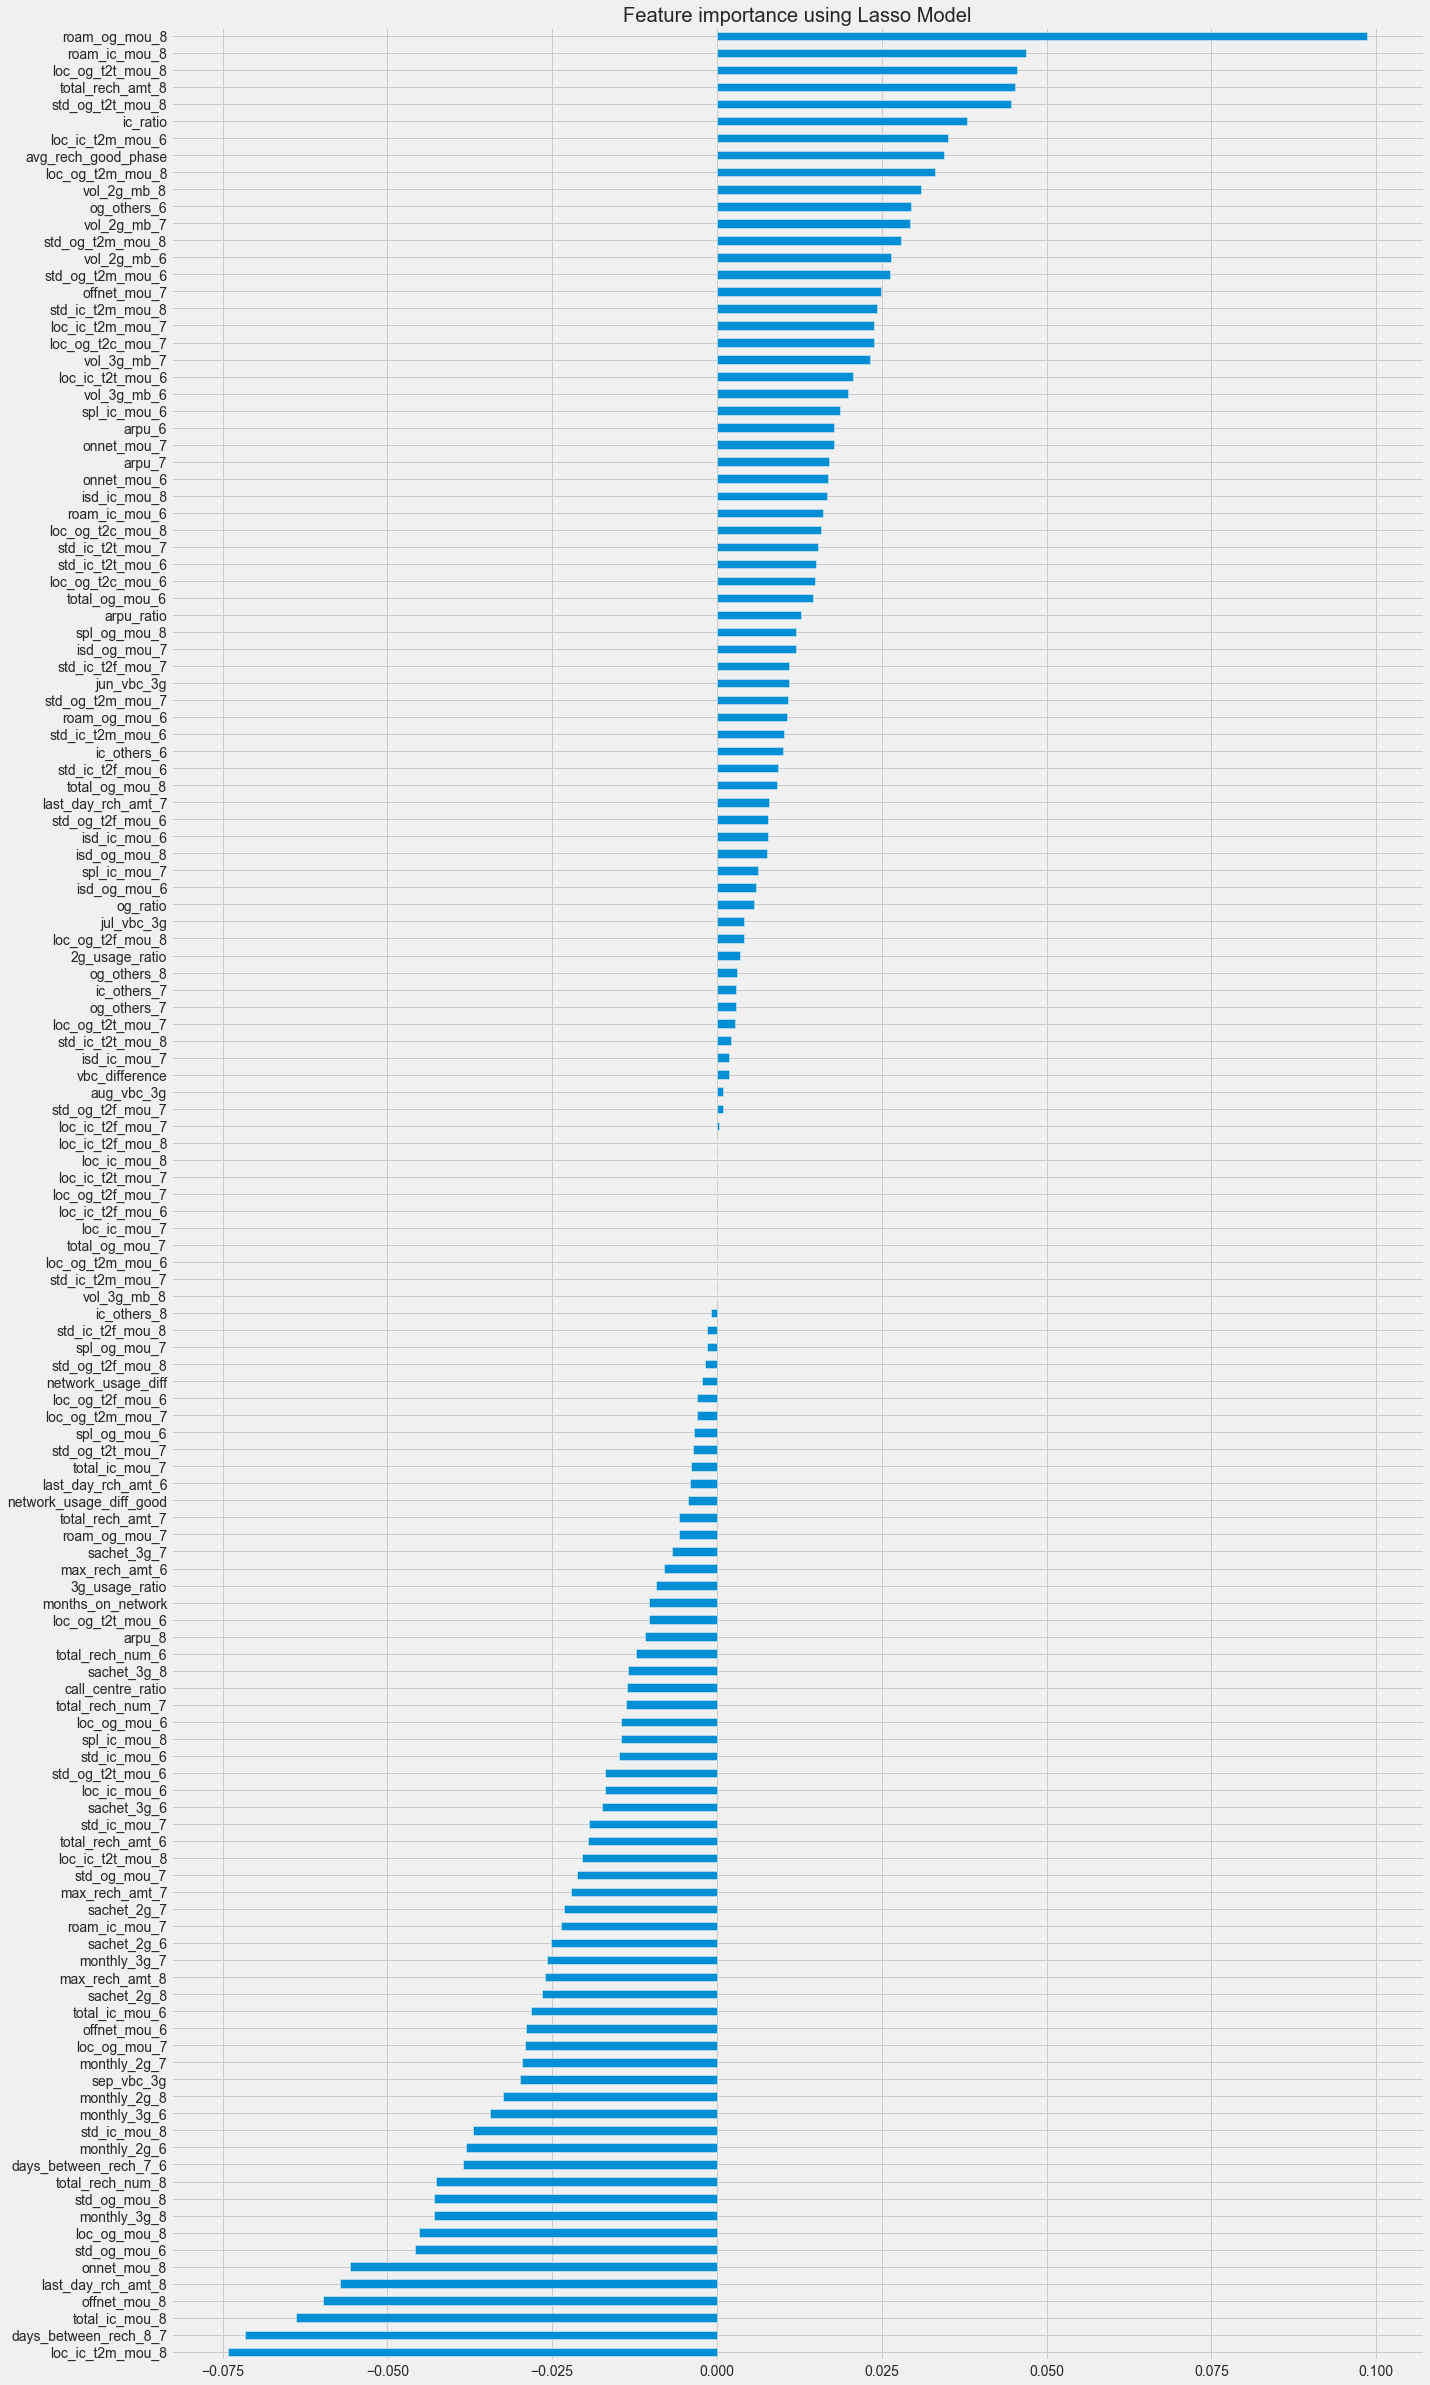

In [113]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 40)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [114]:
# The best indicators of churn in reverse order are:
imp_coef.tail(10)

vol_2g_mb_8           0.031019
loc_og_t2m_mou_8      0.033062
avg_rech_good_phase   0.034425
loc_ic_t2m_mou_6      0.035010
ic_ratio              0.037861
std_og_t2t_mou_8      0.044604
total_rech_amt_8      0.045255
loc_og_t2t_mou_8      0.045448
roam_ic_mou_8         0.046846
roam_og_mou_8         0.098543
dtype: float64

In [117]:
!pip install statsmodels

  Using cached statsmodels-0.12.1-cp38-none-win_amd64.whl (9.2 MB)
  Using cached patsy-0.5.1-py2.py3-none-any.whl (231 kB)


In [118]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [119]:
# Logistic regression model, first training model
logm1 = sm.GLM(list(y_train),(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38040
Model:                            GLM   Df Residuals:                    37902
Model Family:                Binomial   Df Model:                          137
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8318.4
Date:                Sat, 23 Jan 2021   Deviance:                       16637.
Time:                        01:49:57   Pearson chi2:                 4.28e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.2169      0.025     -8.773      0.000      -0.265      -0.168
arpu_6                      0.3574      0.063      5.664      0.000       0.234       0.481
arpu_7                      0.4149      0.069      6.055      0.000       0.281       0.549
arpu_8                     -0.2249      0.075     -3.014      0.003      -0.371      -0.079
onnet_mou_6                 0.2042      0.074      2.749      0.006       0.059       0.350
onnet_mou_7                 0.2439      0.077      3.162      0.002       0.093       0.395
onnet_mou_8                -0.6464      0.078     -8.234      0.000      -0.800      -0.493
offnet_mou_6               -0.5835      0.079     -7.384      0.000      -0.738      -0.429
offnet_mou_7                0.2783      0.079      3.519      0.000       0.123       0.433
offnet_mou_8               -0.7493      0.096     -7.780      0.000      -0.938      -0.561
roam_ic_mou_6               0.1691      0.051      3.333      0.001       0.070       0.269
roam_ic_mou_7              -0.2305      0.062     -3.696      0.000      -0.353      -0.108
roam_ic_mou_8               0.4102      0.050      8.174      0.000       0.312       0.509
roam_og_mou_6               0.1750      0.051      3.436      0.001       0.075       0.275
roam_og_mou_7              -0.0388      0.063     -0.619      0.536      -0.162       0.084
roam_og_mou_8               0.8510      0.051     16.809      0.000       0.752       0.950
loc_og_t2t_mou_6           -0.0652      0.082     -0.799      0.424      -0.225       0.095
loc_og_t2t_mou_7           -0.0937      0.087     -1.076      0.282      -0.264       0.077
loc_og_t2t_mou_8            0.8453      0.095      8.874      0.000       0.659       1.032
loc_og_t2m_mou_6            0.0011      0.131      0.008      0.993      -0.256       0.259
loc_og_t2m_mou_7           -0.4405      0.157     -2.806      0.005      -0.748      -0.133
loc_og_t2m_mou_8            1.3916      0.184      7.545      0.000       1.030       1.753
loc_og_t2f_mou_6           -0.0695      0.031     -2.233      0.026      -0.131      -0.009
loc_og_t2f_mou_7            0.0164      0.031      0.527      0.598      -0.045       0.077
loc_og_t2f_mou_8            0.0853      0.030      2.825      0.005       0.026       0.145
loc_og_t2c_mou_6            0.2078      0.036      5.796      0.000       0.137       0.278
loc_og_t2c_mou_7            0.2760      0.037      7.429      0.000       0.203       0.349
loc_og_t2c_mou_8            0.1737      0.025      7.075      0.000       0.126       0.222
loc_og_mou_6               -0.2335      0.184     -1.268      0.205      -0.594       0.127
loc_og_mou_7                0.1699      0.214      0.796      0.426      -0.249       0.588
loc_og_mou_8               -1.7470      0.243  

### RFE

In [120]:
logreg = LogisticRegression(random_state=100)

In [121]:
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [122]:
rfe.support_

array([False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False,  True, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [123]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 19),
 ('arpu_7', False, 7),
 ('arpu_8', False, 54),
 ('onnet_mou_6', False, 68),
 ('onnet_mou_7', False, 62),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 31),
 ('offnet_mou_7', False, 48),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 65),
 ('roam_ic_mou_7', False, 46),
 ('roam_ic_mou_8', False, 14),
 ('roam_og_mou_6', False, 36),
 ('roam_og_mou_7', False, 96),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 80),
 ('loc_og_t2t_mou_7', False, 102),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 112),
 ('loc_og_t2m_mou_7', False, 26),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 91),
 ('loc_og_t2f_mou_7', False, 107),
 ('loc_og_t2f_mou_8', False, 82),
 ('loc_og_t2c_mou_6', False, 41),
 ('loc_og_t2c_mou_7', False, 35),
 ('loc_og_t2c_mou_8', False, 60),
 ('loc_og_mou_6', False, 51),
 ('loc_og_mou_7', False, 113),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 66),
 ('std_og_t2t_mou_7', False, 119),
 ('std_

In [124]:
col = X_train.columns[rfe.support_]
col

Index(['onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_8', 'total_og_mou_8', 'total_ic_mou_8',
       'monthly_2g_6', 'monthly_2g_8', 'monthly_3g_8',
       'days_between_rech_8_7'],
      dtype='object')

In [125]:
X_train.columns[~rfe.support_]

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'offnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8',
       ...
       'network_usage_diff', 'network_usage_diff_good', '2g_usage_ratio',
       '3g_usage_ratio', 'og_ratio', 'ic_ratio', 'vbc_difference',
       'months_on_network', 'days_between_rech_7_6', 'avg_rech_good_phase'],
      dtype='object', length=122)

### Model Assessment with stats model

In [126]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(list(y_train),X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38040
Model:                            GLM   Df Residuals:                    38024
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11902.
Date:                Sat, 23 Jan 2021   Deviance:                       23805.
Time:                        01:51:21   Pearson chi2:                 6.29e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1757      0.019     -9.338      0.000      -0.213      -0.139
onnet_mou_8              -0.9734      0.037    -26.493      0.000      -1.045      -0.901
offnet_mou_8             -1.0047      0.039    -25.448      0.000      -1.082      -0.927
roam_og_mou_8             1.2407      0.020     62.076      0.000       1.202       1.280
loc_og_t2t_mou_8          0.8002      0.055     14.609      0.000       0.693       0.908
loc_og_t2m_mou_8          0.8000      0.096      8.310      0.000       0.611       0.989
loc_og_mou_8             -1.5265      0.132    -11.599      0.000      -1.784      -1.269
std_og_t2t_mou_8          0.8118      0.043     19.038      0.000       0.728       0.895
std_og_t2m_mou_8          0.8566      0.060     14.182      0.000       0.738       0.975
std_og_mou_8             -1.7029      0.089    -19.050      0.000      -1.878      -1.528
total_og_mou_8            0.9645      0.063     15.316      0.000       0.841       1.088
total_ic_mou_8           -1.3378      0.040    -33.832      0.000      -1.415      -1.260
monthly_2g_6             -0.3979      0.026    -15.349      0.000      -0.449      -0.347
monthly_2g_8             -0.6469      0.037    -17.304      0.000      -0.720      -0.574
monthly_3g_8             -0.6435      0.022    -29.295      0.000      -0.687      -0.600
days_between_rech_8_7    -0.5901      0.017    -34.787      0.000      -0.623      -0.557
=========================================================================================
"""

### Adding the probablity column

Now we add the probablity column as well as the prediction column in order to make our predictions.

In [127]:
# Get the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0   0.087821
1   0.347395
2   0.141548
3   0.927379
4   0.149082
5   0.989445
6   0.030887
7   0.073858
8   0.915801
9   0.627017
dtype: float64

In [128]:
y_train_pred_final = pd.DataFrame({'Churned':y_train.values, 'Churn_Prob':y_train_pred})

In [129]:
y_train_pred_final.head()

,Churned,Churn_Prob
0,0,0.087821
1,0,0.347395
2,0,0.141548
3,0,0.927379
4,0,0.149082


In [130]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.035 else 0)

y_train_pred_final.head()

,Churned,Churn_Prob,predicted
0,0,0.087821,1
1,0,0.347395,1
2,0,0.141548,1
3,0,0.927379,1
4,0,0.149082,1


## Confusion Metrics

In [131]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics

In [132]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted )
print(confusion)

[[ 6066 12954]
 [  127 18893]]


In [133]:
#overall accuracy check
print(metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.predicted))

0.6561251314405888


## VIFs

In [134]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,loc_og_mou_8,62.820000
4,loc_og_t2m_mou_8,33.870000
8,std_og_mou_8,25.320000
9,total_og_mou_8,15.720000
7,std_og_t2m_mou_8,12.300000
3,loc_og_t2t_mou_8,11.420000
1,offnet_mou_8,6.300000
6,std_og_t2t_mou_8,5.660000
0,onnet_mou_8,5.140000
10,total_ic_mou_8,5.140000


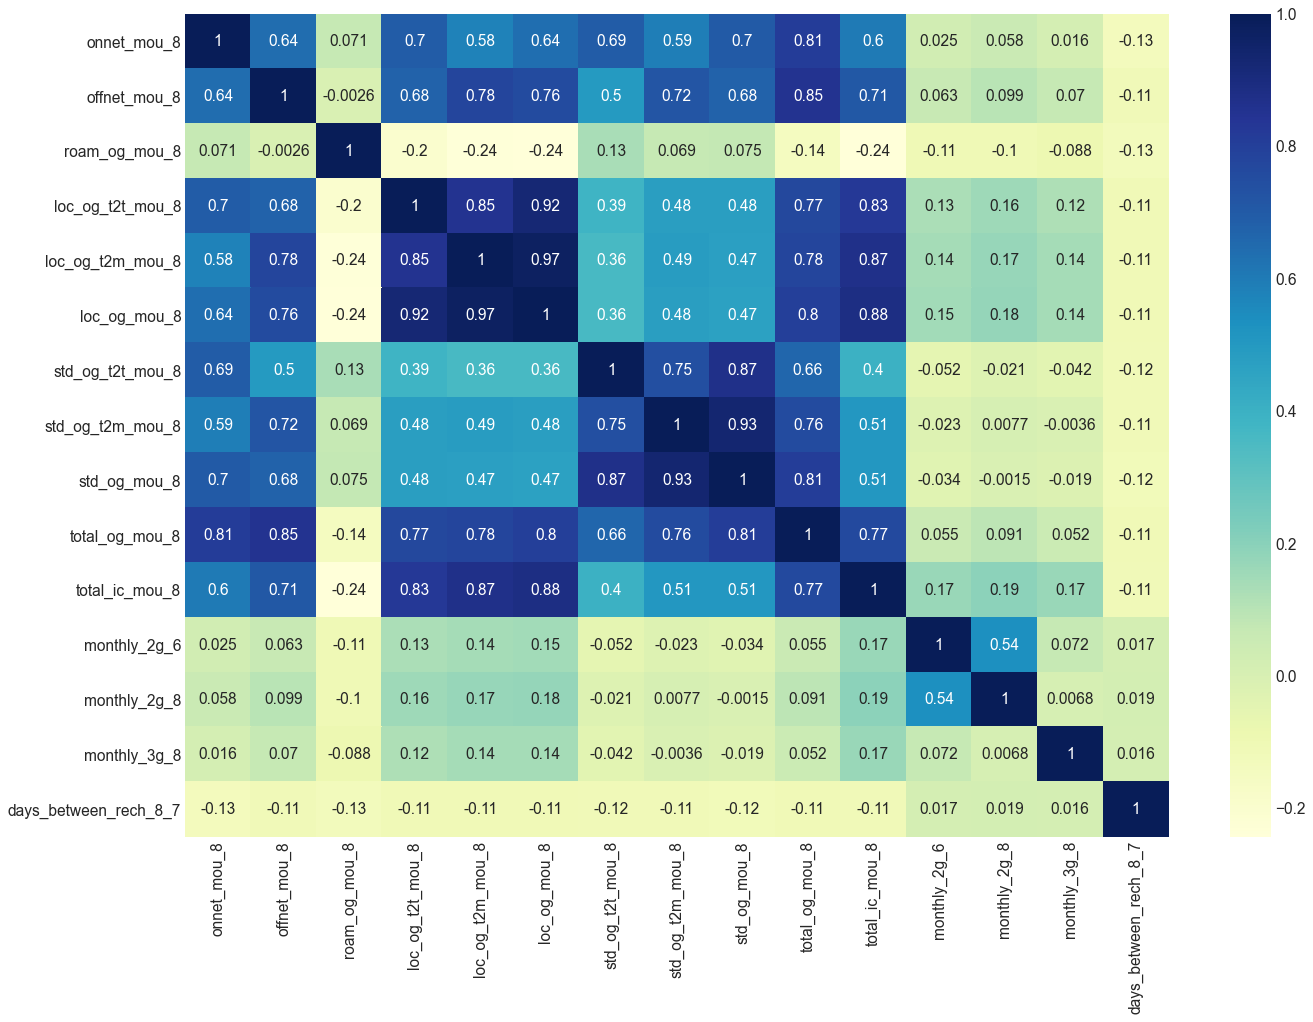

In [135]:
plt.figure(figsize=(18,13), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

### Removal of variables and updation of the Model

Some of the variable have high VIFs although the p-value of them are in a good state. Those variables are insignificant and can be dropped.

In [136]:
col = col.drop('loc_og_mou_8', 1)
col

KeyError: "['loc_ic_mou_6'] not found in axis"

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(list(y_train),X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

In [ ]:
# Get the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

In [ ]:
y_train_pred_final = pd.DataFrame({'Churned':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

In [ ]:
values = y_train_pred_final.Churned * y_train_pred_final.Churn_Prob
m = values.mean()
m

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > m else 0)
y_train_pred_final.head()

In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted )
print(confusion)

In [ ]:
print(metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.predicted))

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
plt.figure(figsize=(10,7), dpi=60, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

### Removal of variables and updation of the Model

Some of the variable have high VIFs although the p-value of them are in a good state. Those variables are insignificant and can be dropped.

In [ ]:
col = col.drop('total_ic_mou_8', 1)
col

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(list(y_train),X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

In [ ]:
# Get the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

In [ ]:
y_train_pred_final = pd.DataFrame({'Churned':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

In [ ]:
values = y_train_pred_final.Churned * y_train_pred_final.Churn_Prob
m = values.mean()
m

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > m else 0)
y_train_pred_final.head()

In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted )
print(confusion)

In [ ]:
print(metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.predicted))

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
plt.figure(figsize=(10,7), dpi=60, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

## Our latest models features are as follows:

1. All variables have p-values equal to 0.
2. All the features have very low VIF values (less than 5) that means there is less muliticollinearity among the features as per heat map.
3. The overall accuracy of 0.88 at a probability threshold of 0.05 is quite acceptable. So we shouldn't drop more variables and we should proceed with the predictions using this model.

## Calculating Sensitivity and Specificity

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# calculate specificity
TN / float(TN+FP)

In [ ]:
# false postive rate
print(FP/ float(TN+FP))

In [ ]:
# positive predicted value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

In [ ]:
### ROC Curve

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churned, y_train_pred_final.Churn_Prob, drop_intermediate = False )

In [ ]:
draw_roc(y_train_pred_final.Churned, y_train_pred_final.Churn_Prob)

### The area under the curve

In [ ]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [ ]:
auc = auc_val(fpr,tpr)
auc

## Finding the Probablity Cutoff Point

In [ ]:
# create columns with different probability cutoffs 
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
#calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
### Plot of the accuracy, sensitivity and specificity for various probabilities

In [ ]:
#plt.figure(figsize=(60, 30))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(25,8))
#plt.xticks(np.arange(0, 1, step=0.05), size = 15)
plt.xticks(np.arange(0, 1, step=0.025), size = 15)                    
plt.yticks(size = 10)
plt.show()



In [ ]:
### 0.48 is the optimum point to take it as a cutoff probability

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.48 else 0)

y_train_pred_final.head()

In [ ]:
metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.final_predicted)

In [ ]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.final_predicted)
confusion1

In [ ]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [ ]:
#sensitivity 
TP / float(TP+FN)

In [ ]:
#specificity
TN / float(TN+FP)

In [ ]:
#false postive rate
print(FP/ float(TN+FP))

In [ ]:
# Positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

In [ ]:
# Precision and Recall

In [ ]:
precision = confusion1[1,1]/(confusion1[0,1]+confusion1[1,1])
precision

In [ ]:
recall = confusion1[1,1]/(confusion1[1,0]+confusion1[1,1])
recall

In [ ]:
precision_score(y_train_pred_final.Churned, y_train_pred_final.final_predicted)

In [ ]:
recall_score(y_train_pred_final.Churned, y_train_pred_final.final_predicted)

In [ ]:
y_train_pred_final.Churned, y_train_pred_final.final_predicted

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churned, y_train_pred_final.Churn_Prob)

In [ ]:
plt.figure(figsize=(18, 6), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.025))
plt.show()

### The optimal threshold value is 0.48

In [ ]:
# F1 score
F1 = 2*(precision*recall)/(precision+recall)
F1

In [ ]:
# Making predictions on the test set
X_test1 = X_test # Added by Madhu
X_test = X_test[col]
X_test.head()

In [ ]:
X_test_sm = sm.add_constant(X_test)

In [ ]:
y_test_pred = res.predict(X_test_sm)

In [ ]:
y_test_pred[:10]

In [ ]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
y_pred_1.head()

In [ ]:
y_test_df = pd.DataFrame(y_test)

In [ ]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

In [ ]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [ ]:
y_pred_final.head()

In [ ]:
y_pred_final.shape

In [ ]:
# Using the probability threshold value 0f 0.525 on the test dataset to predict if a churn will take place.

y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.525 else 0)

In [ ]:
y_pred_final.head()

In [ ]:
#accuracy.
acc_score=metrics.accuracy_score(y_pred_final.churn_data, y_pred_final.final_predicted)
acc_score

In [ ]:
confusion_test = metrics.confusion_matrix(y_pred_final.churn_data, y_pred_final.final_predicted )
print(confusion_test)

In [ ]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [ ]:
#sensitivity
TP / float(TP+FN)

In [ ]:
#specificity
TN / float(TN+FP)

In [ ]:
# false postive rate
print(FP/ float(TN+FP))

In [ ]:
# Positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

In [ ]:
Precision = confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])
Precision

In [ ]:
Recall = confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])
Recall

In [ ]:
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

In [ ]:
print(classification_report(y_pred_final.churn_data, y_pred_final.final_predicted))

In [ ]:
# Cross Validation Score To avoid overfitting, calculate the Cross Validation Score to see how our model performs

In [ ]:
lr = LogisticRegression(solver = 'lbfgs',random_state=42)
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

In [ ]:
# ROC for test data set
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.churn_data, y_pred_final.Churn_Prob, drop_intermediate = False )

In [ ]:
draw_roc(y_pred_final.churn_data, y_pred_final.Churn_Prob)

In [ ]:
# Area under curve
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [ ]:
auc = auc_val(fpr,tpr)
auc

As a rule of thumb, an AUC can be classed as follows,

0.90 - 1.00 = excellent

0.80 - 0.90 = good

0.70 - 0.80 = fair

0.60 - 0.70 = poor

0.50 - 0.60 = fail

Auc is 0.93, our model seems to be doing excellent on the test dataset.

In [ ]:
### Feature Importance
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

In [ ]:
#feature_importance = abs(new_params)
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

In [ ]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

In [ ]:
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:blue',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

In [ ]:
### Top 3 feature selection.
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

# PCA

In [ ]:
#Import PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [ ]:
X_train.head()

In [ ]:
pca.fit(X_train)

In [ ]:
print(pca.components_)
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 
                       'PC3':pca.components_[2],'PC4':pca.components_[3],
                       'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],
                       'Feature':colnames})
pcs_df.head(10)

In [ ]:
%matplotlib inline
fig = plt.figure(figsize = (15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### 50 components explain ~90% of variance in the data.

In [ ]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=50)

df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

### Correlation matrix

In [ ]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [ ]:
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [ ]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# Observe that correlations are indeed very close to 0

In [ ]:
#Apply selected components to the test data
df_test_pca = pca_final.transform(X_test1)
df_test_pca.shape

# RandomForestClassifier with PCA

In [ ]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced',random_state=42)

# fit
rfc.fit(df_train_pca,y_train)

# Making predictions
y_pred_default = rfc.predict(df_test_pca)

In [ ]:
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

In [ ]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

### Hyperparameter tuning for RandomForest

In [ ]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

rf_with_pca = RandomForestClassifier(class_weight='balanced',random_state=42)


# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
rf_with_pca.fit(df_train_pca, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores)

In [ ]:
# plot accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(8,16,2),
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 400, 100), 
    'max_features': [8, 10, 12]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced',random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 5, n_jobs=-1, verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of ',grid_search.best_score_,' using ',grid_search.best_params_)

In [ ]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=14,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=8,
                             n_estimators=200,
                             random_state=42)

In [ ]:
# fit
rfc.fit(df_train_pca,y_train)

In [ ]:
# predict
y_pred_default = rfc.predict(df_test_pca)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score:  ',accuracy_score(y_test,y_pred_default))

In [ ]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

In [ ]:
TN = confusion_rf_hyper[0,0] # true positive 
TP = confusion_rf_hyper[1,1] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives

print('Accuracy Score:  ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

# Recomendation for Model Selection
- Logistic Regression(Lasso and RFE) and Random Forest(with PCA) performed good for customer churn analysis for this particular dataset.
- LogisticRegression has an acuracy of 93% and AUC 0.93
- Accuracy of RandomForest with PCA has accuracy of 89% and sensitivity 0.77
- LogisticRegression is the best model out of the two

In [ ]:
feature_names=list(X_train.columns.values)
res = pd.DataFrame(list(dict(zip(feature_names, rfc.feature_importances_)).items()))
res.columns = ["Feature","Importance"]

### Top 5 churn indicators 

In [ ]:
res.sort_values(by ="Importance").tail(5)